In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/NTPC.csv")

In [4]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-11-05,NTPC,EQ,62.00,88.00,88.00,70.00,75.55,75.55,73.12,232535736,1.700363e+15,NaN,115350904,0.4961
1,2004-11-08,NTPC,EQ,75.55,76.80,78.60,75.00,75.15,75.20,76.88,68865277,5.294024e+14,NaN,25571231,0.3713
2,2004-11-09,NTPC,EQ,75.20,75.10,76.10,74.55,75.25,75.30,75.28,37460886,2.820236e+14,NaN,13585363,0.3627
3,2004-11-10,NTPC,EQ,75.30,75.50,75.95,75.00,75.05,75.05,75.32,17413433,1.311585e+14,NaN,7039001,0.4042
4,2004-11-11,NTPC,EQ,75.05,75.35,75.40,74.30,74.60,74.45,74.74,15961426,1.193037e+14,NaN,7286922,0.4565


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4088 non-null   object 
 1   Symbol              4088 non-null   object 
 2   Series              4088 non-null   object 
 3   Prev Close          4088 non-null   float64
 4   Open                4088 non-null   float64
 5   High                4088 non-null   float64
 6   Low                 4088 non-null   float64
 7   Last                4088 non-null   float64
 8   Close               4088 non-null   float64
 9   VWAP                4088 non-null   float64
 10  Volume              4088 non-null   int64  
 11  Turnover            4088 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4088 non-null   int64  
 14  %Deliverble         4088 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 479.2

In [6]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4.088000e+03,4.088000e+03,2456.000000,4.088000e+03,4088.000000
mean,150.982828,151.194557,153.261448,148.898165,150.984112,150.992723,151.081429,7.226587e+06,9.836028e+13,42760.128664,3.865508e+06,0.587853
std,35.876588,35.937187,36.505939,35.298697,35.836771,35.857614,35.892690,1.029073e+07,1.123018e+14,31482.663614,5.284435e+06,0.141008
min,62.000000,73.600000,74.800000,70.000000,73.500000,73.550000,73.120000,3.049400e+04,5.352130e+11,530.000000,1.487500e+04,0.107200
25%,128.925000,129.487500,130.937500,126.900000,128.975000,128.925000,129.035000,2.510830e+06,3.813959e+13,22590.500000,1.491542e+06,0.496550
50%,152.450000,152.500000,154.725000,150.250000,152.500000,152.450000,152.545000,4.316195e+06,6.514962e+13,34270.500000,2.582018e+06,0.601600
75%,172.662500,172.562500,175.100000,170.212500,172.425000,172.662500,172.662500,7.972249e+06,1.179299e+14,53559.250000,4.456084e+06,0.690875
max,284.650000,289.000000,290.750000,271.150000,286.850000,284.650000,282.140000,2.325357e+08,2.059513e+15,307195.000000,1.709463e+08,0.939700


In [7]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [8]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [9]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [10]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [11]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [12]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [13]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4083,3.073872,-1.491101,102.40,24369413,NaN
4084,1.819076,0.000000,102.05,17763436,NaN
4085,1.762115,0.729217,103.60,15160578,NaN
4086,2.289333,-1.481836,103.05,11588556,NaN
4087,3.527683,0.195599,102.45,15321193,NaN


In [14]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [15]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
#Define the prediction model
model = RandomForestRegressor()

In [17]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8630197555826837


In [19]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [20]:
predictions = model.predict(X_Check)

In [21]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

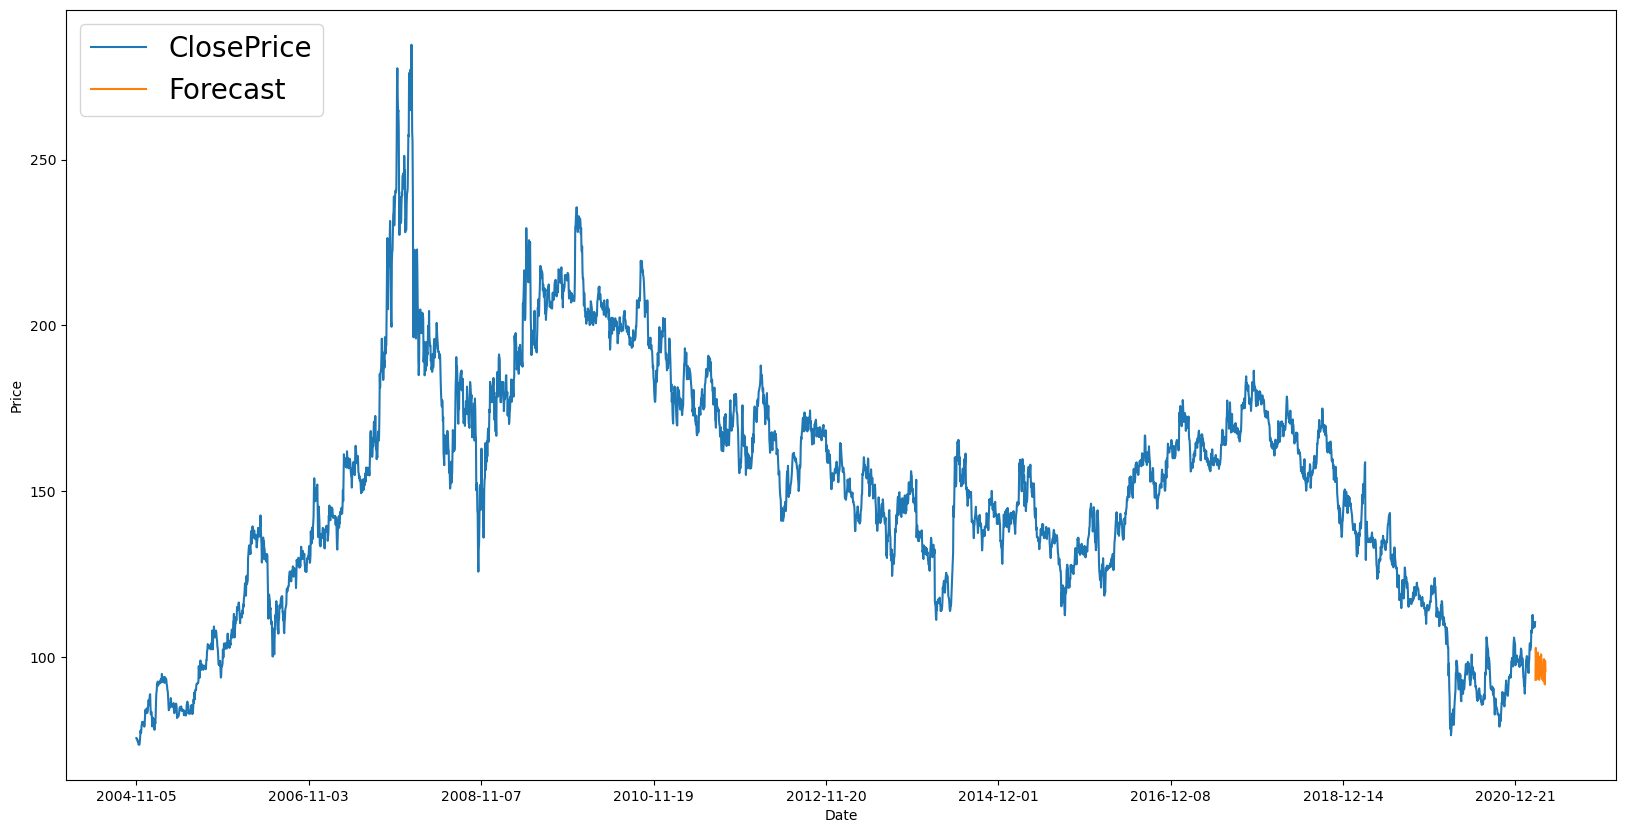

In [22]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')